_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
__________

40000/40000 [==============================] - 1s 27us/step - loss: 1.4302 - acc: 0.4941 - val_loss: 1.4383 - val_acc: 0.4963
Epoch 50/200
40000/40000 [==============================] - 1s 28us/step - loss: 1.4348 - acc: 0.4960 - val_loss: 1.4656 - val_acc: 0.4765
Epoch 51/200
40000/40000 [==============================] - 1s 28us/step - loss: 1.4229 - acc: 0.4937 - val_loss: 1.5128 - val_acc: 0.4694
Epoch 52/200
40000/40000 [==============================] - 1s 32us/step - loss: 1.4248 - acc: 0.4961 - val_loss: 1.4452 - val_acc: 0.4916
Epoch 53/200
40000/40000 [==============================] - 1s 32us/step - loss: 1.4148 - acc: 0.4983 - val_loss: 1.4181 - val_acc: 0.5019
Epoch 54/200
40000/40000 [==============================] - 1s 34us/step - loss: 1.4118 - acc: 0.5002 - val_loss: 1.4361 - val_acc: 0.5011
Epoch 55/200
40000/40000 [==============================] - 1s 37us/step - loss: 1.4064 - acc: 0.5047 - val_loss: 1.4143 - val_acc: 0.5028
Epoch 56/200
40000/40000 [==============

Epoch 108/200
40000/40000 [==============================] - 2s 53us/step - loss: 1.2273 - acc: 0.5609 - val_loss: 1.3413 - val_acc: 0.5317
Epoch 109/200
40000/40000 [==============================] - 2s 53us/step - loss: 1.2154 - acc: 0.5686 - val_loss: 1.3366 - val_acc: 0.5309
Epoch 110/200
40000/40000 [==============================] - 1s 35us/step - loss: 1.2158 - acc: 0.5655 - val_loss: 1.3428 - val_acc: 0.5314
Epoch 111/200
40000/40000 [==============================] - 2s 38us/step - loss: 1.2191 - acc: 0.5662 - val_loss: 1.3407 - val_acc: 0.5397
Epoch 112/200
40000/40000 [==============================] - 1s 37us/step - loss: 1.2124 - acc: 0.5678 - val_loss: 1.3592 - val_acc: 0.5195
Epoch 113/200
40000/40000 [==============================] - 2s 38us/step - loss: 1.2155 - acc: 0.5653 - val_loss: 1.3610 - val_acc: 0.5236
Epoch 114/200
40000/40000 [==============================] - 2s 43us/step - loss: 1.2061 - acc: 0.5740 - val_loss: 1.3233 - val_acc: 0.5364
Epoch 115/200
40000/

40000/40000 [==============================] - 1s 25us/step - loss: 1.0788 - acc: 0.6160 - val_loss: 1.3137 - val_acc: 0.5462
Epoch 167/200
40000/40000 [==============================] - 1s 36us/step - loss: 1.0772 - acc: 0.6132 - val_loss: 1.3109 - val_acc: 0.5442
Epoch 168/200
40000/40000 [==============================] - 1s 36us/step - loss: 1.0720 - acc: 0.6165 - val_loss: 1.3270 - val_acc: 0.5426
Epoch 169/200
40000/40000 [==============================] - 1s 36us/step - loss: 1.0709 - acc: 0.6171 - val_loss: 1.3269 - val_acc: 0.5411
Epoch 170/200
40000/40000 [==============================] - 1s 27us/step - loss: 1.0723 - acc: 0.6164 - val_loss: 1.2874 - val_acc: 0.5559
Epoch 171/200
40000/40000 [==============================] - 1s 36us/step - loss: 1.0696 - acc: 0.6165 - val_loss: 1.3246 - val_acc: 0.5444
Epoch 172/200
40000/40000 [==============================] - 1s 36us/step - loss: 1.0700 - acc: 0.6158 - val_loss: 1.3065 - val_acc: 0.5465
Epoch 173/200
40000/40000 [=======

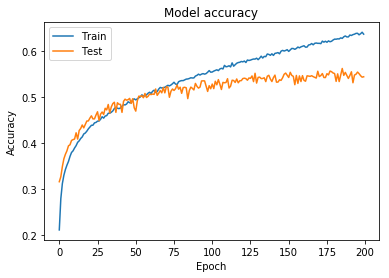

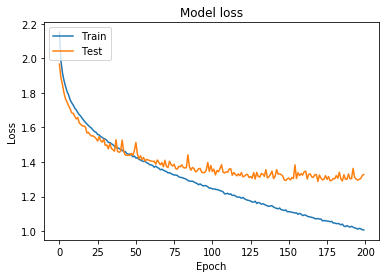

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

#numpy pagckage
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.utils import to_categorical

#load CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# compute the number of labels
num_labels = np.amax(y_train) + 1
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


image_size = x_train.shape[2]
input_size = image_size * image_size * 3
#reshape due to RGB channel
x_train = x_train.reshape(-1, input_size)
x_test = x_test.reshape(-1, input_size)

# using float data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 512
epochs = 200
dropout = 0.45
max_batches = len(x_train) / batch_size

# this is 3-layer MLP with ReLU after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# validate the model on test dataset to determine generalization

x_train = np.reshape(x_train, [-1, input_size])
history = model.fit(x_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size)


# Score trained model.
x_test = np.reshape(x_test, [-1, input_size])
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Despite having ten times as many epochs, the MLP still trails the CNN by around 10 percent.